In [ ]:
"""
All source codes are from:
https://www.kaggle.com/cesarcf1977/movielens-data-analysis-beginner-s-first

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
"""
"""
이 노트의 모든 소스코드는
https://www.kaggle.com/cesarcf1977/movielens-data-analysis-beginner-s-first
에서 발췌되었습니다.

모든 소스코드는 아파치 2.0라이센스 하에 사용되었으며,
아래의 소스코드는 해당 라이센스를 위반하여 사용될 수 없습니다.
라이센스의 사본은 아래 링크에서 확인 가능합니다.

    http://www.apache.org/licenses/LICENSE-2.0

라이센스의 국문 번역은 아래 링크에서 확인 가능합니다.

    https://www.olis.or.kr/license/Detailselect.do?lId=1002

해당 소프트웨어는 관련 법, 또는 서면화된 동의에 의해 규정되지 아니하였다면,
타이틀이나 비침해성, 특정한 목적에 대한 적합성 또는 상품성을 보증하지 않은
'있는 그대로의' 상태로 제공됩니다. 자세한 사용 허가와 제한사항은 라이센스를
참고하시기 바랍니다.
"""

In [4]:
#import the required modules
from t의meit import default_timer #get system time
start = default_timer #set 'start' as the current time

import pandas as pd # pandas : lib for handling massive data
import numpy as np # numpy : the 'base of base' for mathmatics in python
import matplotlib.pyplot as plt # matplotlib : for the data visualization
plt.style.use('ggplot') # setting the plot data

print('libraries are successfully loaded')


libraries are successfully loaded


In [7]:
#import the csv files


#record the starting time
st = default_timer()

#declare variables
# DataFrame 형태로 반환되는데 이는 일반적인 파이썬 리스트와 유사한데 2차원이라 생각하면 됨
# pandas에서 1차원은 series라고 불림
movies  :pd.DataFrame
ratings :pd.DataFrame
#형식 지정을 했지만... pandas는 unknown형태 반환이 많아 사실상 의미없음 (강한 타입 검사 불가)

# load the massive data using pandas
# read_csv method reads the csv data and record it as the dataFrame (2d, resizable, heterogeneous table)
# csv파일을 한줄씩 읽을 필요 없이 한줄로 모든 내용 불러올 수 있음
# 데이터의 일괄적이고 빠른 처리를 위해 한번에 메모리로 불러오는게 유리
movies = pd.read_csv('./data/movie.csv')
ratings = pd.read_csv('./data/rating.csv')

print('all data files are successfully loaded')
# sort the data and update the index for futher data handling
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop=True)

print(ratings.dtypes)

# movie data handling
# dataframe[fieldname] = fieldname이 붙은 세로줄
# dataframe.필드이름으로도 접속 가능
# unknown이라 .str로 문자열로 바꾸어야 문자열함수 사용가능
# extract로 정규식 결과에 맞게 추출(4자리 정수, (와 ) 포함, 앞뒤 문자 상관없음)
# 다시 말해 이 정규식은 (2000)같은 글자를 찾으려 한 것.
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True) #generate new field 'year' from the title, as the four digit year
# 이제 year 필드가 생겼으니 movies.year로 접속 가능
# 쉽게 말하면 이건 엑셀에 새 행을 만들고 year 제목을 넣어준 뒤, 4자리 년도 번호를 넣은거!
movies.year = pd.to_datetime(movies.year, format='%Y') #convert datatime as the datatime object, which consisted with just year
# 이걸 년도 형태로 바꾸는데 우리가 필요한 건 년도 '숫자'지 날짜가 아니므로
movies.year = movies.year.dt.year # import the year data again
# 그 datetime에서 년도만 추출해 숫자로 다시 year에 입력

# 여기서 대충 보이지만 자료형이 str->time->int로 아아아아주 날뛰고 있음. 파이썬은 자료형이 고정되어있지 않아서 이런게 가능
# ...그런데 그러면 버그나기 엄청 쉽잖아



movies.title = movies.title.str[:-7] #get 7 character from the title and return to the title field
#title은 뒤에서 7글자만 사용 -> 안겹치면서 분량 줄이려고 저러는듯?

# 장르 데이터를 만들것. 이건 간단히 말해, 존재하는 모든 장르를 겹치지 않게 나열한거.
# 그런데 그러면 series를 써도 되지 않나 싶음...
#장르가 drama|horror|action....식으로 있으므로 |로 split함
#그런데 split하면 문자열 리스트의 dataframe이 되어버리잖아 -> stack로 모든 리스트를 다 펼친 뒤 세로로 쌓아버림
#그리고 unique로 중복 제거
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
#그런데 이 필드 이름이 없으니 genre라는 이름이 붙은 dataframe을 새로 만들어서 덮어씌워버림
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) #generate header 'genre'
#이번엔 movie dataframe에도 비슷한 짓을 함.
#get_dummies를 돌리면 2차원의 true/false 타입을 얻을 수 있음
#그런데 여기서는 장르를 안쪼갰다 아직? (따라서 x축이 action, horror...가 아니라 action|horror, action|drama... 이런 식)
movies = movies.join(movies.genres.str.get_dummies().astype(bool))
# the result will be
#   genre_a genre_b genre_c
#   true    false   true
#   false   true    true
#... and so on

#이제 원래의 장르 데이터는 필요 없으니까 날려버림
# inplace옵션을 쓰면 다시 대입할 필요  없이 원본 movies를 덮어씌워버림
movies.drop('genres', inplace=True, axis=1) #delete the orignal 'genre' column

print("movie data ready")

'''
# 이번엔 점수 데이터 변경. 먼저 시간은 datetime 형태로 바꾸어버리기
ratings.timestamp = pd.to_datetime(ratings.timestamp, infer_datetime_format=True)
#그 중에서 우리에게 필요한 건 년도뿐이니 또 덮어씌움
ratings.timestamp = ratings.timestamp.dt.year #extract the year data and overwrite
'''
#이거 한줄로 되지 않나?
ratings.timestamp = pd.to_datetime(ratings.timestamp, infer_datetime_format=True).dt.year

print("rating data ready")

# 널값(존재하지 않는 값)은 모두 지워버리기. 처리속도만 길어져
print ("Number of movies Null values: ", max(movies.isnull().sum()))
print ("Number of ratings Null values: ", max(ratings.isnull().sum()))
movies.dropna(inplace=True)#drop NaN values => 데이터에서는 NaN이라고(엑셀처럼), 프로그램에선 Null이라고 많이 부름
ratings.dropna(inplace=True)#drop NaN values
    
# 이제 정렬하고, 지우면서 몇 줄의 인덱스가 날아갔을테니 인덱스도 리셋함. 그러면 데이터를 처리할 준비가 완료됨
movies.sort_values(by='movieId', inplace=True)
ratings.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.reset_index(inplace=True, drop=True)

print("All data ready")
#calculate runtime
runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))


all data files are successfully loaded
userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object
movie data ready
rating data ready
Number of movies Null values:  22
Number of ratings Null values:  0
All data ready
Elapsed time(sec):  51.39


In [9]:

#데이터 결과물좀 보고 싶어서 추가한 저장코드
movies.to_csv("movie_edited.csv")
ratings.to_csv("ratings_edited.csv")

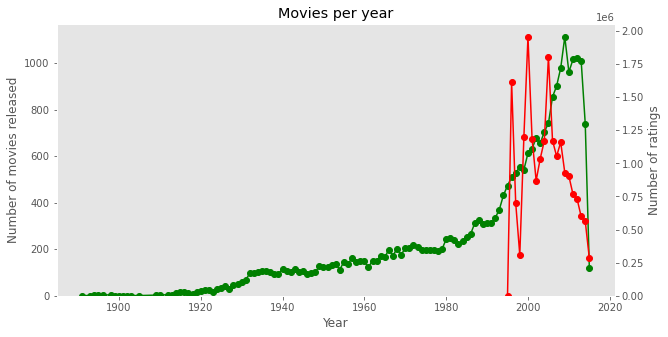

Elapsed time(sec):  1.45


In [6]:
#data visualization 1 : time-values(value1:movie year, value2:rating timestamp)
#여기서부터는 데이터 그리는거
#데이터 이것저것 뚜닥거리는데는 그때그때 돌려서 확인 가능한 ipython(interactive python)이 좋음
#jupyter notebook 쓰면 좋은 부분

#recount the timer
st = default_timer()

# slice the data by year, and define that sliced dataframe 'dftmp'
dftmp:pd.DataFrame
dftmp = movies[['movieId', 'year']].groupby('year')

#plot setup for time-movie year
fig :plt.Figure
ax1 :plt.Axes
ax2 :plt.Axes
fig, ax1 = plt.subplots(figsize=(10,5)) #figure size = 10,5
ax1.plot(dftmp.year.first(), dftmp.movieId.nunique(), "g-o") #color : green, symbol : o
ax1.grid(None)#no grid
ax1.set_ylim(0,)#y limit auto

dftmp = ratings[['rating', 'timestamp']].groupby('timestamp')#now slice the dataframe by timestamp
ax2 = ax1.twinx()#share same x axis
ax2.plot(dftmp.timestamp.first(), dftmp.rating.count(), "r-o") #color : red, symbol : o
ax2.grid(None)#no grid
ax2.set_ylim(0,)#y limit auto

#set overall graph parameter
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released'); ax2.set_ylabel('Number of ratings')
plt.title('Movies per year')
plt.show()

#calculte the elapsed time
runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

<Figure size 720x360 with 0 Axes>

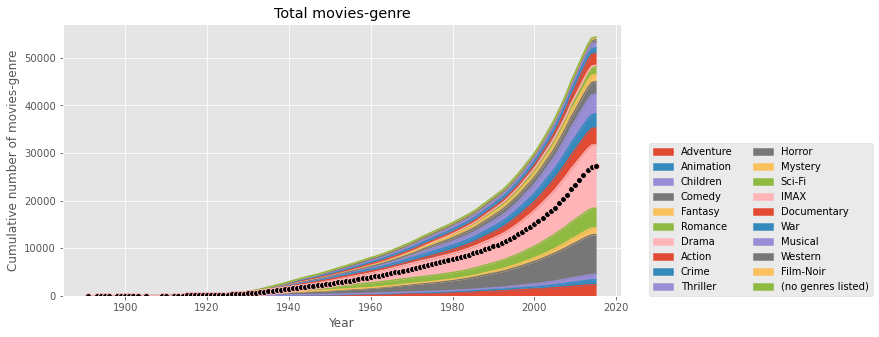

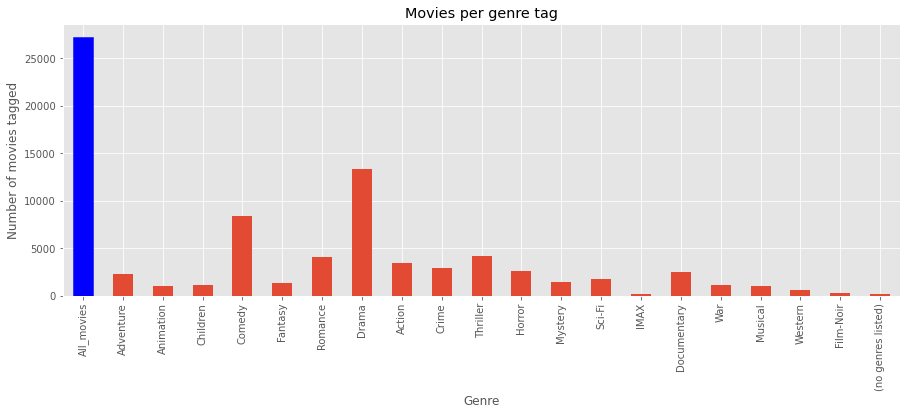

Elapsed time(sec):  1.43


In [6]:
#plot 2: histogram

st = default_timer()

plt.figure(figsize=(10,5))
dftmp = movies[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()}) #generate the cumulate sum data

# generate datable, which consisted with of each cumulated sum of each movie
for genre in genres_unique.genre: #search in genres_unique, which contains all genre single time
    dftmp = movies[movies[genre]][['movieId', 'year']].groupby('year') #1. obtain the movie data with certain genre 2. slice it with year
    df[genre]=dftmp.movieId.nunique().cumsum() #df = cumulate sum of each genre, with years

df.fillna(method='ffill', inplace=True) #if there are null data, fill with the last value
df.loc[:,df.columns!='All_movies'].plot.area(stacked=True, figsize=(10,5)) 

# Plot histogram for all movies
plt.plot(df['All_movies'], marker='o', markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Total movies-genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()

# Plot simple scatter of the number of movies tagged with each genre
plt.figure(figsize=(15,5))
barlist = df.iloc[-1].plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count 
plt.xticks(rotation='vertical')
plt.title('Movies per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of movies tagged')
plt.show()

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

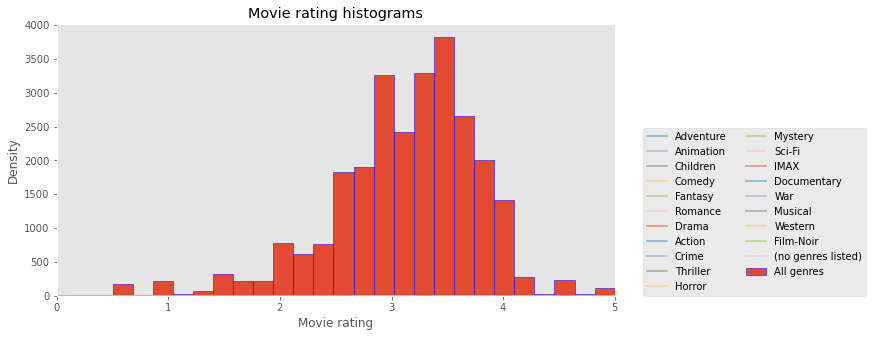

Elapsed time(sec):  42.13


In [7]:
st = default_timer()

dftmp = ratings[['movieId','rating']].groupby('movieId').mean()

# Initialize empty list to capture basic stats by gere
rating_stats = []
# Plot general histogram of all ratings
dftmp.hist(bins=25, grid=False, edgecolor='b', label ='All genres', figsize=(10,5))
# Plot histograms (kde lines for better visibility) per genre
for genre in genres_unique.genre:
    dftmp = movies[movies[genre]==True]
    dftmp = ratings[ratings.set_index('movieId').index.isin(dftmp.set_index('movieId').index)]
    dftmp = dftmp[['movieId','rating']].groupby('movieId').mean()
    dftmp.rating.plot(grid=False, alpha=0.6, kind='kde', label=genre)
    avg = dftmp.rating.mean()
    std = dftmp.rating.std()
    rating_stats.append((genre, avg, std))
plt.legend(loc=(1.05,0), ncol=2)
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [8]:
st = default_timer()

# Construct a DataFrame with all the basic stats per genre
rating_sum = pd.DataFrame(rating_stats,  columns=['genre', 'average', 'std_dev'])
rating_sum.set_index('genre', inplace=True)
# Display a boxplot to show the dispersion of average and standard deviation
bxplot = plt.boxplot(rating_sum.T, labels=['Average', 'STD'], sym="ro")
# Properly label the outliers
outliers = []
for i, value in enumerate(bxplot['fliers']):
    for val in value.get_ydata():
        bxplot_label = rating_sum.index[rating_sum.iloc[:, i] == val][0]
        outliers.append(bxplot_label)
        plt.annotate(bxplot_label, xy=(i+1.1, val+np.random.uniform(-0.25,0.25))) # Trick to prevent overlapping
outliers = set(outliers)
plt.ylim(0,)
plt.ylabel('Movie rating')
plt.title('Movie rating descriptive stats')
plt.show()

# Bar chart with average rating, standard deviation and normalized number of ratings per genre
# Calculate the normalized number of ratings per genre
rating_sum['num_ratings_norm']=df.iloc[-1, 1:]/df.iloc[-1, 1:].sum()
# Calculate the average rating for all genres
rating_sum['average_all']=rating_sum.average.mean()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

rating_sum[['average', 'std_dev']].plot(kind='bar', color=['b','r'], ax=ax, position=0.5, grid=False)
rating_sum['average_all'].plot(kind='line',style='--', color=['black'], ax=ax, grid=False)
rating_sum['num_ratings_norm'].plot(kind='line', color='g', ax=ax2, grid=False, linewidth=3)

ax.legend(loc=2)
ax2.legend(loc=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Movie rating descriptive stats')
plt.autoscale()
ax2.set_ylim(0,)
plt.show()

print("Outliers: ", outliers)
print(rating_sum.T)

# Quick pie chart to visualize how 3 genres take almost 50% of ratings
rating_sum.sort_values(by='num_ratings_norm', inplace=True)
plt.pie(rating_sum['num_ratings_norm'], labels=rating_sum.T.columns, labeldistance=1.5)
plt.show()


# Housekeeping
%reset_selective -f (^avg$|ax|bxplot|^df$|^dftmp$|^i$|^rating_stats$|^rating_sum$|^val$|^value$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

ValueError: Dimensions of labels and X must be compatible

In [ ]:

dftmp = movies[['movieId', 'year']].set_index('movieId').join(
    ratings[['movieId','rating']].groupby('movieId').mean())

plt.figure(figsize=(10,5))
plt.plot(dftmp.year, dftmp.rating,"g.", markersize=4)
plt.xlabel('Year')
plt.ylabel('Movie average rating')
plt.title('All movies rating')
plt.ylim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [ ]:
st = default_timer()

plt.figure(figsize=(10,5))
# For each genre
for genre in genres_unique.genre:
    # Select only movies matching current genre. Pick only movieId (as index) and year.
    dftmp = movies[movies[genre]==True][['movieId', 'year']].set_index('movieId')
    # Selects ratings, with movieId as index. Select only movies that match also the previous step. Join both.
    dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                       .groupby('movieId').mean())
    # Now we have a df of movieId, year and multiple ratings. Group by year and compute the average rating.
    dftmp = dftmp.groupby('year').mean()
    plt.plot(dftmp, label = genre, alpha=0.7)

# For all genres
dftmp = movies[['movieId', 'year']].set_index('movieId')
dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                   .groupby('movieId').mean())
dftmp = dftmp.groupby('year').mean()
plt.plot(dftmp, "o", label='All genres', color='black')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average rating per year per genre')
plt.legend(loc=(1.05,0), ncol=2)
plt.ylim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^genre$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [ ]:
st = default_timer()

plt.figure(figsize=(10,5))
for genre in outliers:
    # Select only movies matching current genre. Pick only movieId (as index) and year.
    dftmp = movies[movies[genre]==True][['movieId', 'year']].set_index('movieId')
    # Selects ratings, with movieId as index. Select only movies that match also the previous step. Join both.
    dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                       .groupby('movieId').mean())
    # Now we have a df of movieId, year and multiple ratings. Group by year and compute the average rating.
    dftmp = dftmp.groupby('year').mean()
    plt.plot(dftmp, label = genre, alpha=0.7)

# For all genres
dftmp = movies[['movieId', 'year']].set_index('movieId')
dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                   .groupby('movieId').mean())
dftmp = dftmp.groupby('year').mean()
plt.plot(dftmp, "o", label='All genres', color='black')
    
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average rating per year (outlier genres)')
plt.legend(loc=(1.05,0), ncol=2)
plt.ylim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^genre$|^outliers$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [ ]:
st = default_timer()

dftmp = ratings[['userId','rating']].groupby('userId').mean()
# Plot histogram
dftmp.plot(kind='hist', bins=50, grid=0, normed=True, edgecolor='black', figsize=(10,5))
# Plot cumulative function on top (couldn't do any other way)
# evaluate the histogram
values, base = np.histogram(dftmp, bins=40, normed=True)
# evaluate the cumulative (multiply by the average distance between points in the x-axis to get UNIT area)
cumulative = np.cumsum(values) * np.diff(base).mean()
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue', label='CDF')
plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^base$|^cumulative$|^values$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [ ]:
st = default_timer()
# Combine movies year with ratings timestamps
dftmp = movies[['movieId', 'year']].merge(ratings[['movieId', 'timestamp']], on='movieId')
dftmp = dftmp.groupby(['year', 'timestamp']).count().reset_index()
dftmp.columns=['year', 'timestamp', 'count']
dftmp = dftmp.pivot('year', 'timestamp')

# Plot using a contour (color reflects number of ratings for each year-timestamp pair).
# Could also use heatmap or imshow...
X=dftmp.columns.levels[1].values
Y=dftmp.index.values
Z=dftmp.values
Xi,Yi = np.meshgrid(X, Y)

fig, axs = plt.subplots(2,2)
fig.set_size_inches(14,7)
cutoff = [np.nanmax(Z), 50000, 25000, 10000] # Modify the contour plots a different max values.
Zcap = np.copy(Z)
locx = [0.45, 0.91, 0.45, 0.91] # x location for the individual colorbars
locy = [0.53, 0.53, 0.1, 0.1] # y location for the individual colorbar
for i, ax in enumerate(axs.flatten()):
    Zcap[Zcap>cutoff[i]]=cutoff[i]
    cmvals = ax.contourf(Yi, Xi, Zcap, 100, cmap=plt.cm.spectral)
    ax.set_xlabel('Movie year')
    ax.set_ylabel('Rating timestamp')
    ax.set_title('Cutoff value: %s ratings' %cutoff[i], fontsize=10)
    cax = fig.add_axes([locx[i], locy[i], 0.015, 0.35])
    fig.colorbar(cmvals, cax=cax, orientation='vertical')
fig.suptitle('Ratings per movie-year', fontsize=15)
plt.subplots_adjust(hspace=0.35,wspace=0.45)

# Highlight key regions in the plots, just roughly...
axs.flatten()[2].plot([1980, 1995, 2015, 1998, 1980], [1998, 2014.5, 2014.5, 1998, 1998], 
                      '--', color='black',linewidth=3)
axs.flatten()[3].plot([1970, 1985, 2015, 1998, 1970], [1998, 2014.5, 2014.5, 1998, 1998], 
                      '--', color='black',linewidth=3)
plt.show()

# Housekeeping
%reset_selective -f (^ax$|^axs$|^cmvals$|^cutoff$|^dftmp$|^i$|loc|X|Y|Z)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [ ]:
st = default_timer()
# Combine movies year with ratings timestamps
dftmp = movies[['movieId', 'year']].merge(ratings[['movieId', 'timestamp', 'rating']], on='movieId')
dftmp.drop('movieId', axis=1, inplace=True)
dftmp = dftmp.groupby(['year', 'timestamp']).mean().reset_index().pivot('year', 'timestamp')

# Plot using a contour (color reflects number of ratings for each year-timestamp pair).
# Could also use heatmap or imshow...
X=dftmp.columns.levels[1].values
Y=dftmp.index.values
Z=dftmp.values
Xi,Yi = np.meshgrid(X, Y)

fig, axs = plt.subplots(2,2)
fig.set_size_inches(14,7)
cutoff = [4.5, 4, 3.5, 3] # Modify the contour plots a different max values.
Zcap = np.copy(Z)
locx = [0.45, 0.91, 0.45, 0.91] # x location for the individual colorbars
locy = [0.53, 0.53, 0.1, 0.1] # y location for the individual colorbar
for i, ax in enumerate(axs.flatten()):
    Zcap[Zcap>cutoff[i]]=cutoff[i]
    cmvals = ax.contourf(Yi, Xi, Zcap, 100, cmap=plt.cm.spectral)
    ax.set_xlabel('Movie year')
    ax.set_ylabel('Rating timestamp')
    ax.set_title('Cutoff rating value: %s' %cutoff[i], fontsize=10)
    cax = fig.add_axes([locx[i], locy[i], 0.015, 0.35])
    fig.colorbar(cmvals, cax=cax, orientation='vertical')
fig.suptitle('Average rating per movie-year', fontsize=15)
plt.subplots_adjust(hspace=0.35,wspace=0.45)

# Highlight key regions in the plots, just roughly...
axs.flatten()[0].plot([1980, 1980, 2015, 1998, 1980], [1996, 2014.5, 2014.5, 1996, 1996], 
                      '--', color='black', linewidth=3)
axs.flatten()[1].plot([1930, 1930, 1980, 1980, 1930], [1996, 2003, 2003, 1996, 1996], 
                      '--', color='black', linewidth=3)
plt.show()

# Housekeeping
%reset_selective -f (^ax$|^axs$|^cax$|^cmvals$|^cutoff$|^dftmp$|^fig$|^i$|loc|X|Y|Z)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [ ]:
st = default_timer()

# Scatter plot of all users and individual ratings count.
dftmp = ratings[['userId', 'movieId']].groupby('userId').count()
dftmp.columns=['num_ratings']
plt.figure(figsize=(15,5))
plt.scatter(dftmp.index, dftmp.num_ratings, edgecolor='black')
plt.xlim(0,len(dftmp.index))
plt.ylim(0,)
plt.title('Ratings per user')
plt.xlabel('userId')
plt.ylabel('Number of ratings given')
plt.show()

# Histogram of ratings counts.
plt.figure(figsize=(15,5))
plt.hist(dftmp.num_ratings, bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of userIds')
plt.xlim(0,)
plt.xticks(np.arange(0,10000,500))
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [ ]:
st = default_timer()

# Scatter plot of all users and individual ratings count.
dftmp = ratings[['userId', 'movieId']].groupby('movieId').count()
dftmp.columns=['num_ratings']
plt.figure(figsize=(15,5))
plt.scatter(dftmp.index, dftmp.num_ratings, edgecolor='black')
plt.xlim(0,dftmp.index.max())
plt.ylim(0,)
plt.title('Ratings per movie')
plt.xlabel('movieId')
plt.ylabel('Number of ratings received')
plt.show()

# Histogram of ratings counts.
plt.figure(figsize=(15,5))
plt.hist(dftmp.num_ratings, bins=100, edgecolor='black', log=True)
plt.title('Ratings per movie')
plt.xlabel('Number of ratings received')
plt.ylabel('Number of movieIds')
plt.xlim(0,)
plt.show()

# Let's check those movies with +40k reviews, those should be pretty popular movies!
print(movies.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>40000]]['title'])
# Let's check the average rating too, those should be pretty good movies!
ratings.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>40000]].groupby('movieId').mean().rating.plot(style='o')
plt.ylabel('Average rating')
plt.title('Most popular movies rating')
plt.show()

# Which is the best most popular movie ever??
tmp = ratings.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>40000]].groupby('movieId').mean()
best = movies.set_index('movieId').loc[tmp.rating.idxmax].title
print ('Best most popular movie ever is...%s' %best)

# Housekeeping
%reset_selective -f (^dftmp$|^tmp$|^best$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

In [ ]:
runtime = default_timer() - start
print ("Elapsed time(sec): ", round(runtime,2))

# Housekeeping
%reset_selective -f (^runtime$|^st$|^start$)